In [1]:
import pandas as pd
file_path = '/content/Day1_OffSpecSmooth_Off_Off.csv'
df = pd.read_csv(file_path, sep='\s+', header=None)  # '\s+' is a regex for one or more spaces

# # ki_z-kf_z [1/A]	    Qz [1/A]	    I [a.u.]
ki = df.iloc[:, 0]
Qz = df.iloc[:, 1]
I = df.iloc[:, 2]
print("First few entries of Qz[1/A]:\n", ki.head())
print("First few entries of I[a.u.]:\n", Qz.head())
print("First few entries of I[a.u.]:\n", I.head())


First few entries of Qz[1/A]:
 0    -3.000000e-02
1    -2.964286e-02
2    -2.928571e-02
3    -2.892857e-02
4    -2.857143e-02
Name: 0, dtype: object
First few entries of I[a.u.]:
 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 1, dtype: float64
First few entries of I[a.u.]:
 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 2, dtype: float64


In [2]:


print("Minimum of Qz [1/A]:", Qz.min())
print("Minimum of I [a.u.]:", I.min())
print("Minimum of ki_z-kf_z [1/A]:", ki.min())


Minimum of Qz [1/A]: 0.0
Minimum of I [a.u.]: -0.0001860604
Minimum of ki_z-kf_z [1/A]: -1.000000e-02


In [3]:


print("Minimum of Qz [1/A]:", Qz.min())
print("Maximum of Qz [1/A]:", Qz.max())
print("Minimum of I [a.u.]:", I.min())
print("Maximum of I [a.u.]:", I.max())
print("Minimum of ki_z-kf_z [1/A]:", ki.min())
print("Maximum of ki_z-kf_z [1/A]:", ki.max())


Minimum of Qz [1/A]: 0.0
Maximum of Qz [1/A]: 0.03838929
Minimum of I [a.u.]: -0.0001860604
Maximum of I [a.u.]: 2.419835
Minimum of ki_z-kf_z [1/A]: -1.000000e-02
Maximum of ki_z-kf_z [1/A]: 9.642857e-03


In [4]:
print("Maximum of Qz [1/A]:", Qz.max())
print("Maximum of I [a.u.]:", I.max())
print("Maximum of ki_z-kf_z [1/A]:", ki.max())

Maximum of Qz [1/A]: 0.03838929
Maximum of I [a.u.]: 2.419835
Maximum of ki_z-kf_z [1/A]: 9.642857e-03


In [5]:
# print("Mean of Qz [1/A]:", Qz.mean())
print("Mean of I [a.u.]:", I.mean())



Mean of I [a.u.]: 0.013889133460104794


In [6]:
# prompt: use missing line as a mark to divide the dataset as diffrent part

import numpy as np

# Find the indices of the missing lines
missing_line_indices = np.where(np.isnan(I))[0]

# Split the data into different parts based on the missing line indices
parts = np.split(df, missing_line_indices)

# Print the number of parts
print("Number of parts:", len(parts))

# Print the first few elements of each part
for i, part in enumerate(parts):
  print(f"Part {i+1}:")
  print(part.head())


Number of parts: 2
Part 1:
               0    1    2
0  -3.000000e-02  0.0  0.0
1  -2.964286e-02  0.0  0.0
2  -2.928571e-02  0.0  0.0
3  -2.892857e-02  0.0  0.0
4  -2.857143e-02  0.0  0.0
Part 2:
                0   1   2
18394  2.071429e- NaN NaN


In [7]:
# Print each parts' head

for i, part in enumerate(parts):
  print(f"Part {i+1}:")
  print(part.head())




Part 1:
               0    1    2
0  -3.000000e-02  0.0  0.0
1  -2.964286e-02  0.0  0.0
2  -2.928571e-02  0.0  0.0
3  -2.892857e-02  0.0  0.0
4  -2.857143e-02  0.0  0.0
Part 2:
                0   1   2
18394  2.071429e- NaN NaN


In [8]:
# Empty lines in the row

empty_lines = df.isnull().sum(axis=1)
print("Number of empty lines in each row:")
print(empty_lines)


Number of empty lines in each row:
0        0
1        0
2        0
3        0
4        0
        ..
18390    0
18391    0
18392    0
18393    0
18394    2
Length: 18395, dtype: int64


In [9]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt


In [10]:
# Define dataframe for dataset

df = pd.DataFrame({
    'ki_z-kf_z [1/A]': ki,
  'Qz [1/A]': Qz,
  'I [a.u.]': I

})
show_df = df.head()
print(show_df)


  ki_z-kf_z [1/A]  Qz [1/A]  I [a.u.]
0   -3.000000e-02       0.0       0.0
1   -2.964286e-02       0.0       0.0
2   -2.928571e-02       0.0       0.0
3   -2.892857e-02       0.0       0.0
4   -2.857143e-02       0.0       0.0


In [11]:


print(df.head(10))


  ki_z-kf_z [1/A]  Qz [1/A]  I [a.u.]
0   -3.000000e-02       0.0       0.0
1   -2.964286e-02       0.0       0.0
2   -2.928571e-02       0.0       0.0
3   -2.892857e-02       0.0       0.0
4   -2.857143e-02       0.0       0.0
5   -2.821429e-02       0.0       0.0
6   -2.785714e-02       0.0       0.0
7   -2.750000e-02       0.0       0.0
8   -2.714286e-02       0.0       0.0
9   -2.678571e-02       0.0       0.0


In [12]:


# Remove rows with missing values
df = df.dropna()

# Remove duplicate rows
df = df.drop_duplicates()

# Print the first few rows of the cleaned data
print(df.head())


  ki_z-kf_z [1/A]  Qz [1/A]  I [a.u.]
0   -3.000000e-02       0.0       0.0
1   -2.964286e-02       0.0       0.0
2   -2.928571e-02       0.0       0.0
3   -2.892857e-02       0.0       0.0
4   -2.857143e-02       0.0       0.0


In [13]:
df = df[df.iloc[:, 1] != 0]
print(df.head())


    ki_z-kf_z [1/A]  Qz [1/A]  I [a.u.]
169   -3.000000e-02  0.000355       0.0
170   -2.964286e-02  0.000355       0.0
171   -2.928571e-02  0.000355       0.0
172   -2.892857e-02  0.000355       0.0
173   -2.857143e-02  0.000355       0.0


In [14]:
# prompt: calculate the correlation coefficient

# correlation = df['Qz [1/A]'].corr(df['I [a.u.]'])
# print("Correlation coefficient between Qz [1/A] and I [a.u.]:", correlation)


Model coefficients: [-0.96229544]
Model intercept: 0.032632762749320275


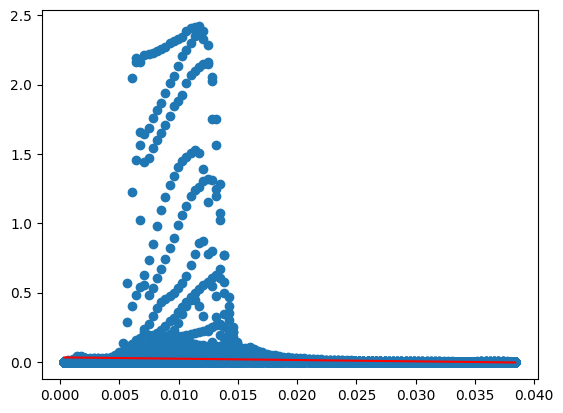

In [15]:
# Perform linear regression to find the relationship between Qz and I

# Import necessary libraries
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Prepare the data
X = df['Qz [1/A]'].values.reshape(-1, 1)
y = df['I [a.u.]'].values

# Train the model
model.fit(X, y)

# Print the model coefficients
print("Model coefficients:", model.coef_)

# Print the model intercept
print("Model intercept:", model.intercept_)

# Make predictions using the model
y_pred = model.predict(X)

# Plot the data and the regression line
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()


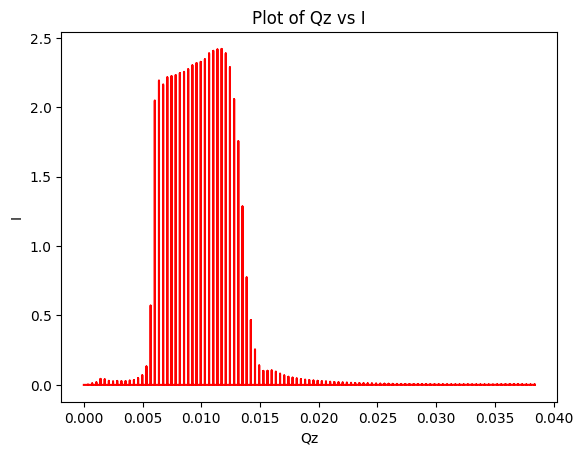

In [16]:
# subplot for Qz and I


import matplotlib.pyplot as plt



fig, ax = plt.subplots(1, 1)
ax.plot(Qz, I, color='red')
ax.set_xlabel('Qz')
ax.set_ylabel('I')
ax.set_title('Plot of Qz vs I')
plt.show()

In [17]:
Qz.describe()


count    18394.000000
mean         0.019166
std          0.011168
min          0.000000
25%          0.009597
50%          0.019195
75%          0.028792
max          0.038389
Name: 1, dtype: float64

In [18]:
I.describe()

count    18394.000000
mean         0.013889
std          0.131685
min         -0.000186
25%          0.000000
50%          0.000000
75%          0.001044
max          2.419835
Name: 2, dtype: float64

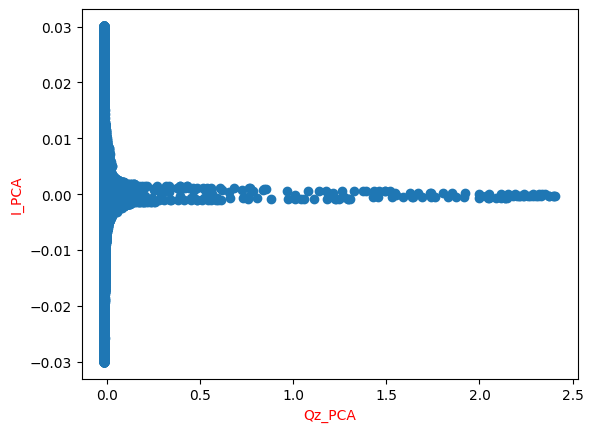

In [19]:
# PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df)

Qz_pca = pca.transform(df)[:, 0]
I_pca = pca.transform(df)[:, 1]

plt.scatter(Qz_pca, I_pca)
plt.xlabel("Qz_PCA",color = 'red')
plt.ylabel("I_PCA",color = 'red')
plt.show()

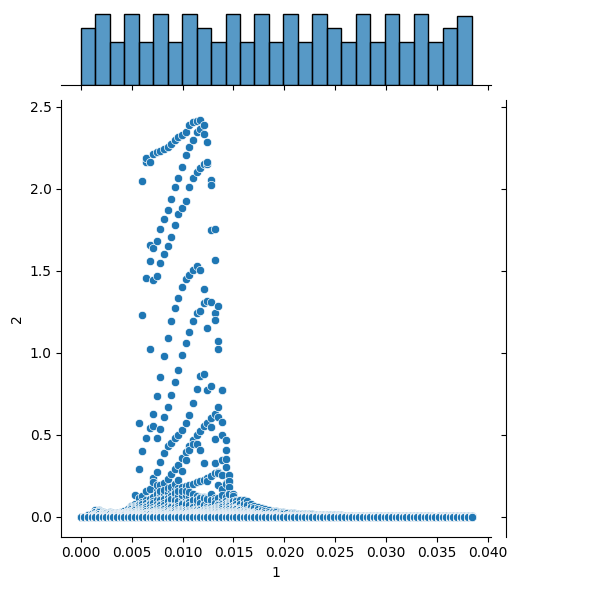

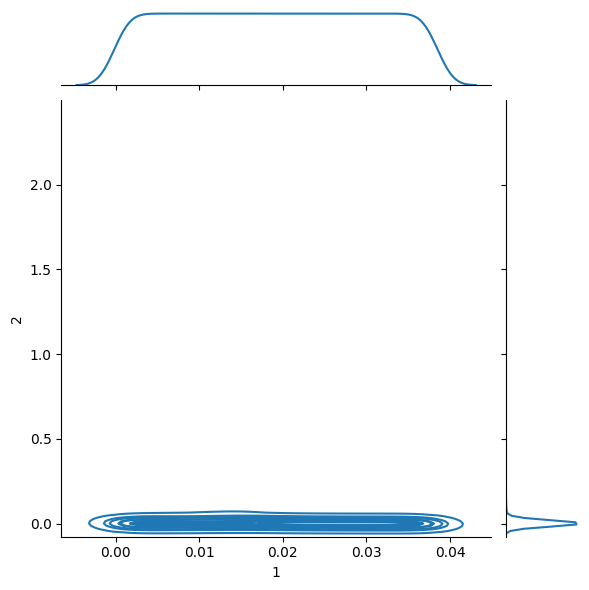

In [20]:
# Distribution plot
import seaborn as sns
import matplotlib.pyplot as plt

# Joint distribution plot
sns.jointplot(x=Qz, y=I, kind='scatter')
plt.show()

# For a version with both the scatter plot and the KDE, use kind='kde'
sns.jointplot(x=Qz, y=I, kind='kde')
plt.show()


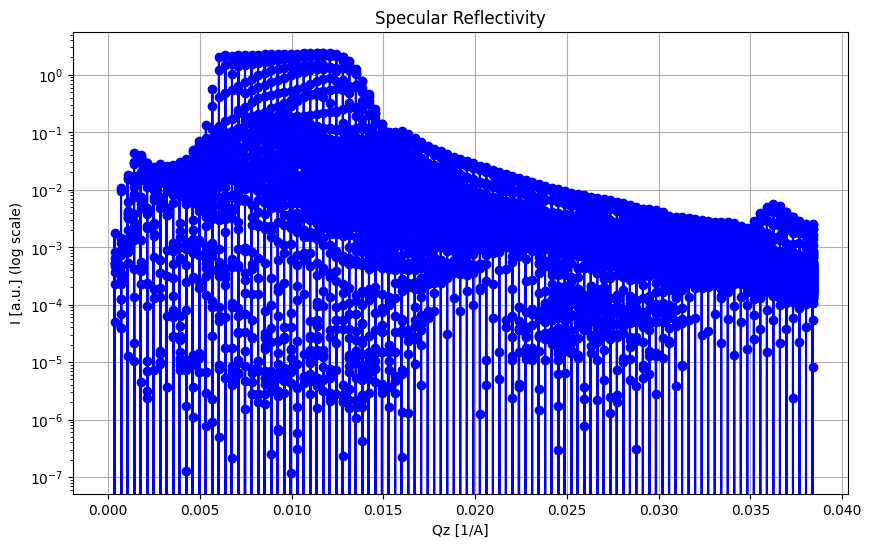

In [21]:




plt.figure(figsize=(10, 6))
plt.plot(Qz, I, marker='o', linestyle='-', color='blue')
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.xlabel('Qz [1/A]')
plt.ylabel('I [a.u.] (log scale)')
plt.title('Specular Reflectivity')
plt.grid(True)
plt.show()


<ipython-input-22-464931d9ca1e>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=Qz, y=I, ci=None)


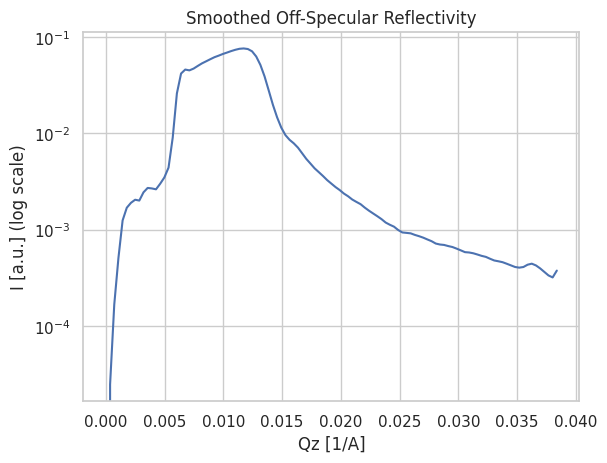

In [22]:
import seaborn as sns



# Set the style of seaborn
sns.set(style="whitegrid")

sns.lineplot(x=Qz, y=I, ci=None)
plt.yscale('log')
plt.xlabel('Qz [1/A]')
plt.ylabel('I [a.u.] (log scale)')
plt.title('Smoothed Off-Specular Reflectivity')
plt.show()


In [23]:
# Interactive Specular Reflectivity Plot
import plotly.express as px

fig = px.scatter(x=Qz, y=I, log_y=True, labels={'x': 'Qz [1/A]', 'I[a.u.]': 'Intensity [a.u.]'})
fig.update_layout(title='Interactive Specular Reflectivity Plot')
fig.show()




<Axes: >

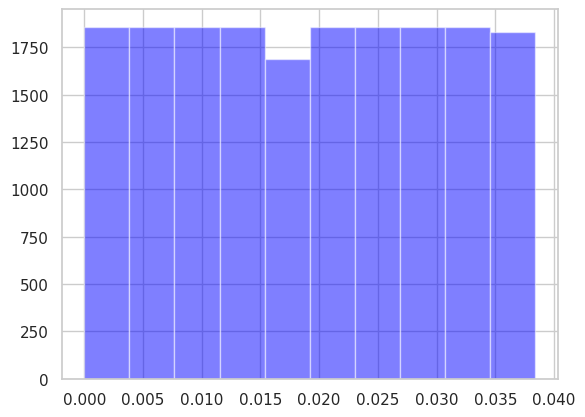

In [24]:
Qz.hist(color='blue', alpha=0.5)

<Axes: >

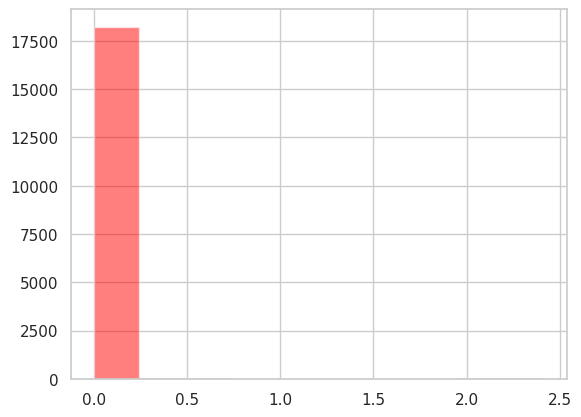

In [25]:
I.hist(color='red', alpha=0.5)

In [26]:
print(Qz.corr(I))
print(I.corr(Qz))

-0.07770691646712513
-0.07770691646712514


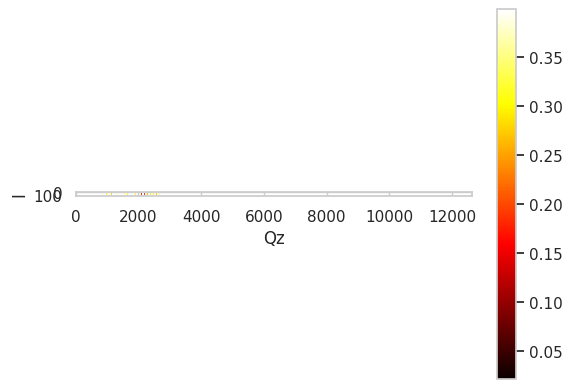

In [27]:
# Heatmap
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Extracting unique Qz and I values from the datasets
q_values = Qz.unique()
r_values = I.unique()

# Initializing a 2D array to hold the likelihood values
# The array dimensions are determined by the number of unique Qz and I values
likelihood = np.zeros((len(q_values), len(r_values)))

# Iterating over all unique Qz values
for i, q in enumerate(q_values):
  # Iterating over all unique I values
  for j, r in enumerate(r_values):
    # Calculating the likelihood of observing the I value (r) given Qz value (q)
    # Assuming a normal distribution centered at Qz (loc=q) with a standard deviation (scale) of 1
    likelihood[i, j] = norm.pdf(r, loc=q, scale=1)

# Visualizing the likelihood matrix as a heatmap
plt.imshow(likelihood, cmap='hot')  # 'hot' colormap to represent likelihood values
plt.xlabel("Qz")  # Label for the x-axis, representing unique Qz values
plt.ylabel("I")  # Label for the y-axis, representing unique I values
plt.colorbar()  # Adding a colorbar to indicate the scale of likelihood values
plt.show()  # Displaying the plot


<ipython-input-28-742e29952113>:16: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-28-742e29952113>:19: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




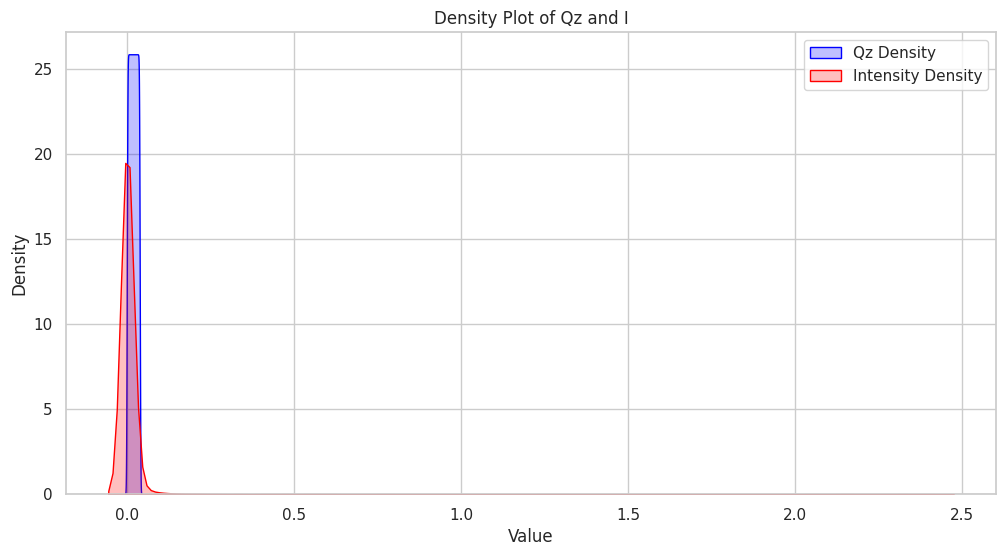

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt



# Set the style of seaborn
sns.set(style="whitegrid")

# Extracting unique Qz and I values from the datasets
q_values = Qz.unique()

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot the KDE for Qz
sns.kdeplot(Qz, color="blue", shade=True, label='Qz Density')

# Plot the KDE for I
sns.kdeplot(I, color="red", shade=True, label='Intensity Density')

# Adding labels
plt.title('Density Plot of Qz and I')
plt.xlabel('Value')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show the plot
plt.show()


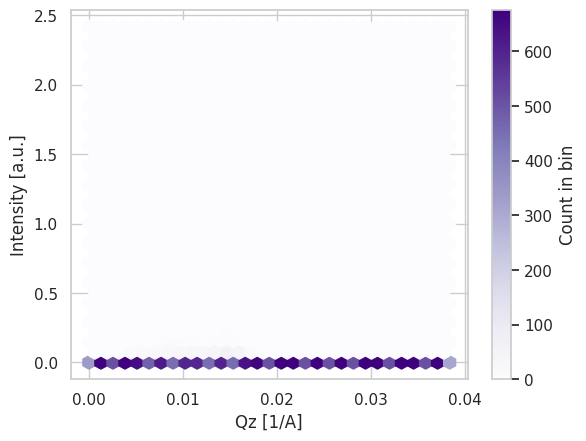

In [29]:
# Creating a hexagonal binning plot, which is a type of two-dimensional
# Histogram used to visualize the density of points in a scatter plot.
plt.hexbin(Qz, I, gridsize=30, cmap='Purples')
plt.colorbar(label='Count in bin')
plt.xlabel('Qz [1/A]')
plt.ylabel('Intensity [a.u.]')
plt.show()


<ipython-input-30-c9076025aabb>:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




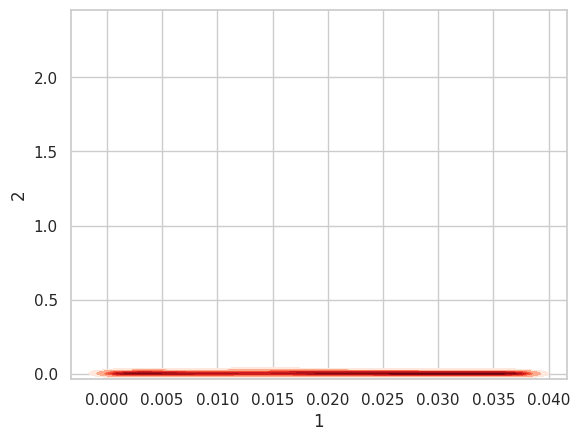

In [30]:
sns.kdeplot(x=Qz, y=I, cmap="Reds", shade=True, bw_adjust=0.5)
plt.show()


In [31]:
import plotly.express as px
fig = px.density_heatmap(x=Qz, y=I, nbinsx=30, nbinsy=30, color_continuous_scale='Purples')
fig.show()


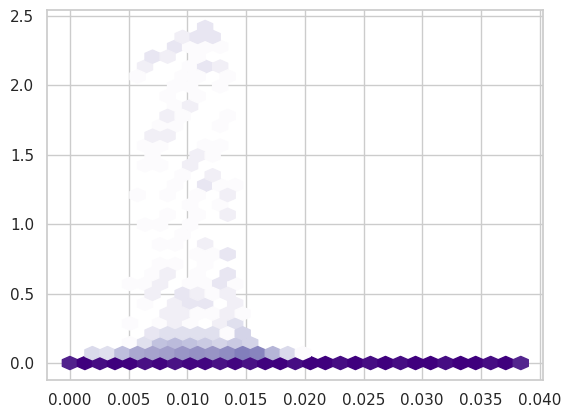

In [32]:
from matplotlib.colors import LogNorm
plt.hexbin(Qz, I, gridsize=30, cmap='Purples', norm=LogNorm())


In [33]:
# Divide the whole dataset with length to see the subset of dataset change.

first_half_Qz = Qz[:len(Qz)//2]
second_half_Qz = Qz[len(Qz)//2:]

first_half_intensity = I[:len(I)//2]
second_half_intensity = I[len(I)//2:]
print(first_half_Qz)
print(second_half_Qz)


0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
9192    0.019195
9193    0.019195
9194    0.019195
9195    0.019195
9196    0.019195
Name: 1, Length: 9197, dtype: float64
9197     0.019195
9198     0.019195
9199     0.019195
9200     0.019195
9201     0.019195
           ...   
18390    0.038389
18391    0.038389
18392    0.038389
18393    0.038389
18394         NaN
Name: 1, Length: 9198, dtype: float64


In [34]:
# Determine the midpoint of the dataset
midpoint = len(Qz) // 2

# Create initial_phase subsets
initial_phase_Qz = Qz.iloc[:midpoint]
initial_phase_I = I.iloc[:midpoint]

# Create second_phase subsets
second_phase_Qz = Qz.iloc[midpoint:]
second_phase_I = I.iloc[midpoint:]


In [35]:
# Describe the initial phase
initial_phase_description = pd.DataFrame({'Qz': initial_phase_Qz, 'I': initial_phase_I}).describe()

# Describe the second phase
second_phase_description = pd.DataFrame({'Qz': second_phase_Qz, 'I': second_phase_I}).describe()

# Print the summaries
print("Initial Phase Summary:\n", initial_phase_description, "\n")
print("Second Phase Summary:\n", second_phase_description)


Initial Phase Summary:
                 Qz            I
count  9197.000000  9197.000000
mean      0.009495     0.026827
std       0.005585     0.185324
min       0.000000    -0.000186
25%       0.004621     0.000000
50%       0.009597     0.000000
75%       0.014218     0.000792
max       0.019195     2.419835 

Second Phase Summary:
                 Qz            I
count  9197.000000  9197.000000
mean      0.028838     0.000951
std       0.005586     0.001947
min       0.019195    -0.000119
25%       0.024171     0.000000
50%       0.028792     0.000399
75%       0.033768     0.001060
max       0.038389     0.034244


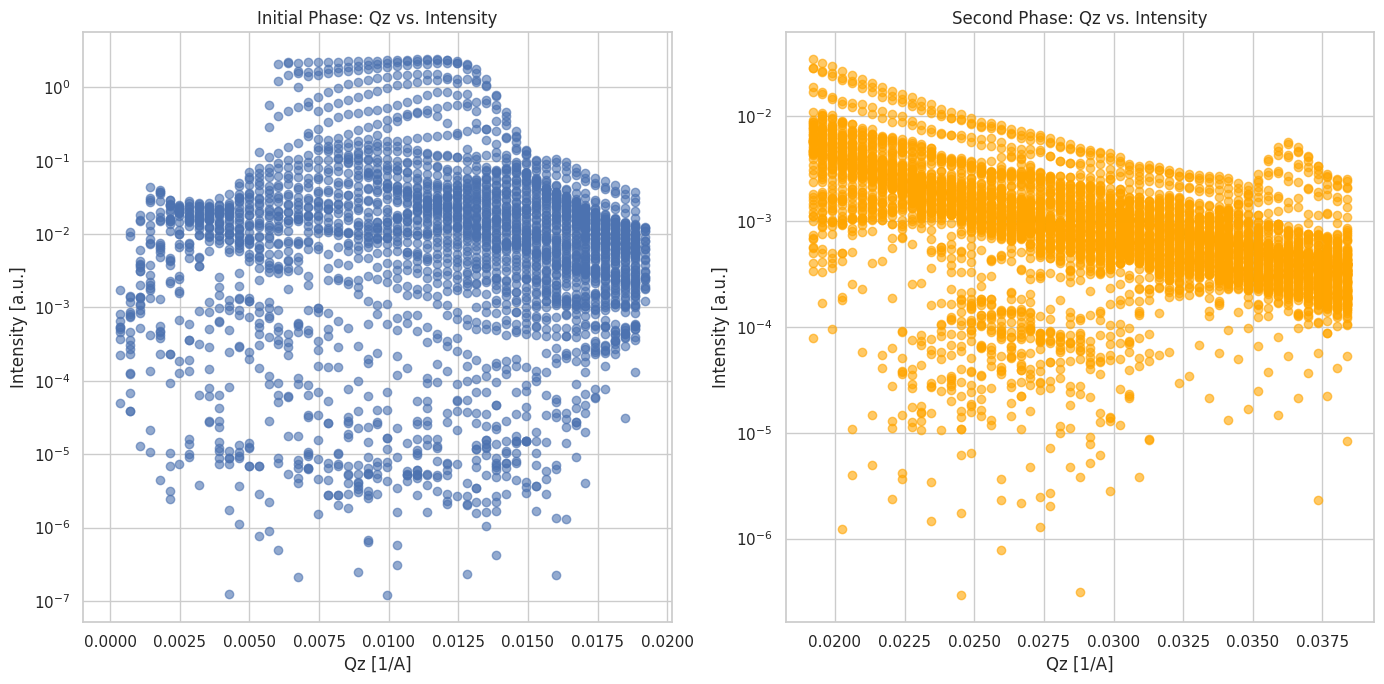

In [36]:
# Subplot for two phase
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")



# Plotting Qz vs. Intensity for each phase
plt.figure(figsize=(14, 7))

# Initial phase
plt.subplot(1, 2, 1)
# Assuming the DataFrame 'Qz' and 'I' have the same index and only one column
plt.scatter(initial_phase_Qz, initial_phase_I, alpha=0.6)
plt.title('Initial Phase: Qz vs. Intensity')
plt.xlabel('Qz [1/A]')
plt.ylabel('Intensity [a.u.]')
plt.yscale('log')  # Using a logarithmic scale for Intensity

# Second phase
plt.subplot(1, 2, 2)
# Assuming the DataFrame 'Qz' and 'I' have the same index and only one column
plt.scatter(second_phase_Qz, second_phase_I, alpha=0.6, color='orange')
plt.title('Second Phase: Qz vs. Intensity')
plt.xlabel('Qz [1/A]')
plt.ylabel('Intensity [a.u.]')
plt.yscale('log')  # Using a logarithmic scale for Intensity

plt.tight_layout()
plt.show()


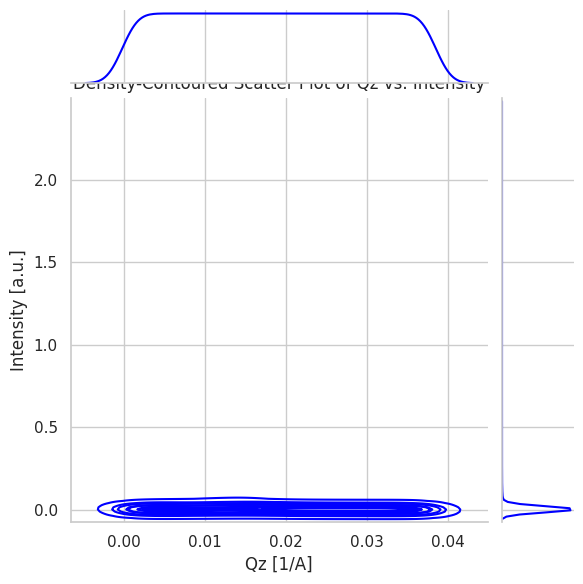

In [37]:
# plotting Qz vs I with a density-contoured scatter plot

sns.jointplot(x=Qz, y=I, kind='kde', color='blue')
plt.xlabel('Qz [1/A]')
plt.ylabel('Intensity [a.u.]')
plt.title('Density-Contoured Scatter Plot of Qz vs. Intensity')
plt.show()


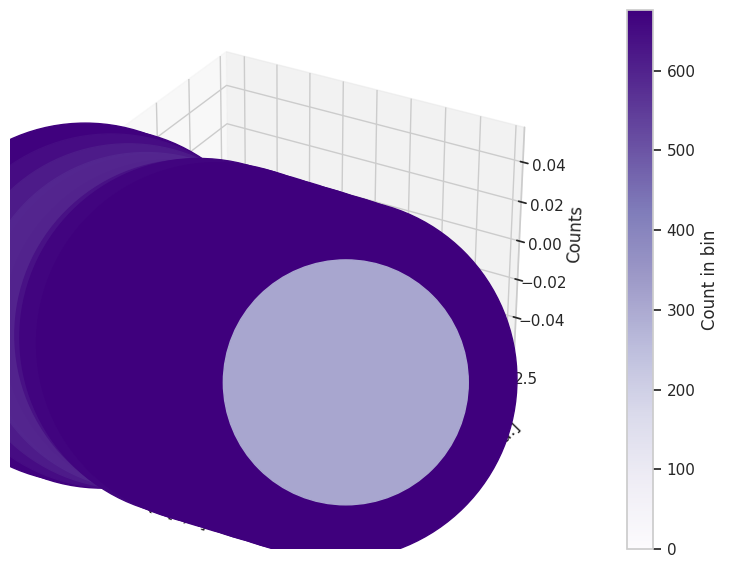

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
# First, perform a 2D hexbin to get the counts in each bin
fig, ax = plt.subplots()
hb = ax.hexbin(Qz, I, gridsize=30)
plt.close(fig)  # We don't need this plot, just the hexbin data

# Extract bin coordinates and counts
counts = hb.get_array()
verts = hb.get_offsets()

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Use bin counts as the z value
z = np.zeros_like(counts)

# Use counts as the size of the scatter points, adjusting the scale as needed
sizes = counts * 100  # Scale factor to adjust the size of the scatter points

# Scatter plot where x, y are bin coordinates, z is zero, and point size represents bin count
sc = ax.scatter(verts[:, 0], verts[:, 1], z, s=sizes, c=counts, cmap='Purples', depthshade=False)

# Add a color bar to indicate the scale of counts
cb = plt.colorbar(sc, ax=ax, pad=0.1)
cb.set_label('Count in bin')

# Set labels
ax.set_xlabel('Qz [1/A]')
ax.set_ylabel('Intensity [a.u.]')
ax.set_zlabel('Counts')

# Show plot
plt.show()
